In [220]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
data = load_wine()

In [222]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data['target']

In [223]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [224]:
X = df[['alcohol', 'malic_acid']]
y = df['target']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [226]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [227]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 0, 2])

In [228]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  3],
       [ 3, 16,  2],
       [ 4,  2,  8]])

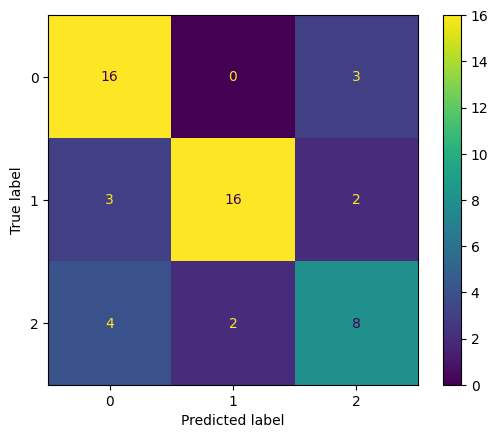

In [229]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



In [231]:
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


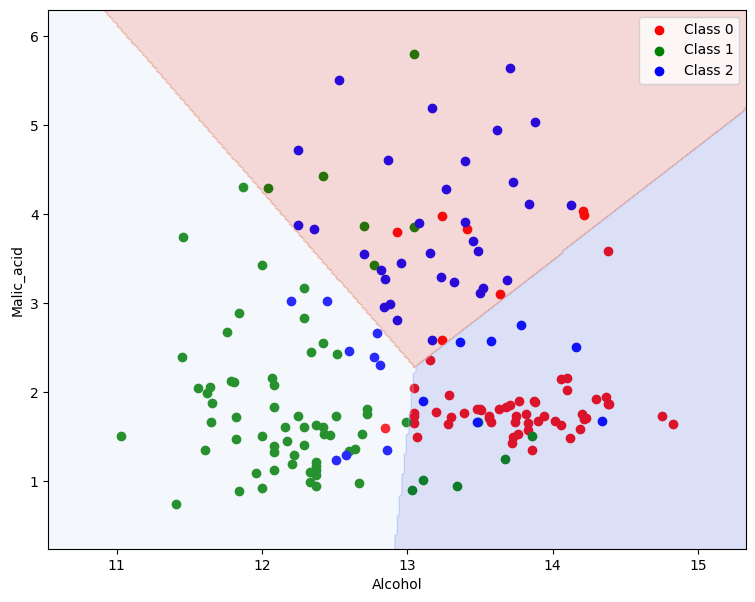

In [232]:
plt.figure(figsize = (9, 7))
# Plotting data points
plt.scatter(df[df['target'] == 0]['alcohol'], df[df['target'] == 0]['malic_acid'], color = 'red', label = 'Class 0')
plt.scatter(df[df['target'] == 1]['alcohol'], df[df['target'] == 1]['malic_acid'], color = 'green', label = 'Class 1')
plt.scatter(df[df['target'] == 2]['alcohol'], df[df['target'] == 2]['malic_acid'], color = 'blue', label = 'Class 2')
# Creating Decision Boundary(Margin)
x_min, x_max = X['alcohol'].min() - 0.5, X['alcohol'].max() + 0.5
y_min, y_max = X['malic_acid'].min() - 0.5, X['malic_acid'].max() + 0.5

# Creating Points using meshgrid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Converting xx, yy into 1d array and then combining it to get (x,y) points for prediction
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.2, cmap = 'coolwarm')

plt.xlabel('Alcohol')
plt.ylabel('Malic_acid')
plt.legend()
plt.show()

In [233]:
df = pd.DataFrame({
    'Experience' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary' : [15000, 20000, 23000, 25000, 30000, 40000, 45000, 60000, 90000, 120000]
})
df.head()

,Experience,Salary
0,1,15000
1,2,20000
2,3,23000
3,4,25000
4,5,30000


In [234]:
X = df[['Experience']]
y = df['Salary']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [236]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [237]:
X_test

,Experience
8,9
1,2
5,6


In [238]:
y_pred = model.predict(X_test)
y_pred

array([82725.24752475,  9623.76237624, 51396.03960396])

In [239]:
y_pred

array([82725.24752475,  9623.76237624, 51396.03960396])

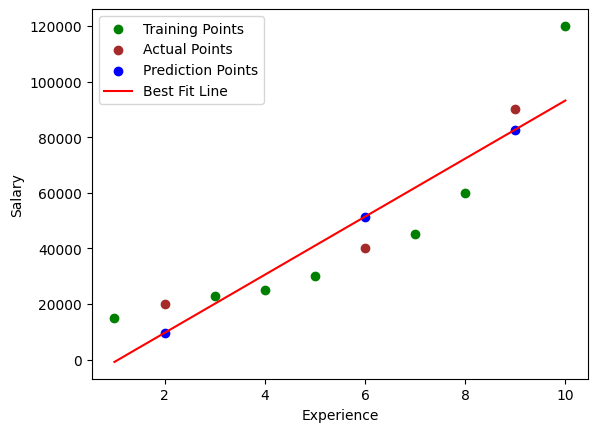

In [240]:
plt.scatter(X_train, y_train, color = 'green', label = 'Training Points')
plt.scatter(X_test, y_test, color = 'brown', label = 'Actual Points')
plt.scatter(X_test, y_pred, color = 'blue', label = 'Prediction Points')
plt.plot(X, model.predict(X), color = 'red', label = 'Best Fit Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [241]:
df = pd.DataFrame({
    'Experience' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary' : [15000, 20000, 23000, 25000, 30000, 40000, 45000, 60000, 90000, 120000]
})
df.head()

,Experience,Salary
0,1,15000
1,2,20000
2,3,23000
3,4,25000
4,5,30000


In [242]:
X = df[['Experience']]
y = df['Salary']

In [243]:
X_poly = PolynomialFeatures(degree = 2)
X_poly = X_poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [244]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [245]:
y_pred = model.predict(X_poly)
y_pred

array([ 21481.81818182,  17875.75757576,  17731.81818182,  21050.        ,
        27830.3030303 ,  38072.72727273,  51777.27272727,  68943.93939394,
        89572.72727273, 113663.63636364])

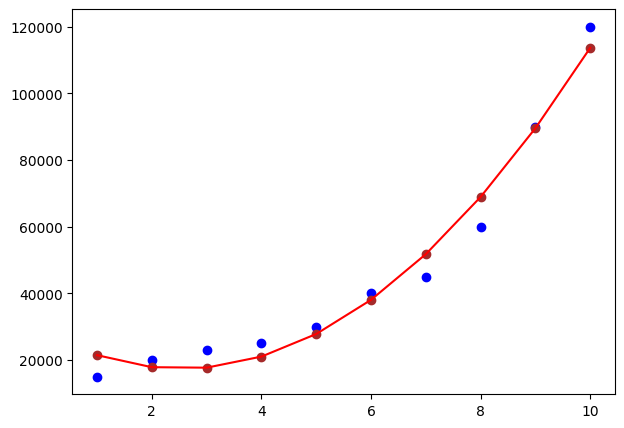

In [246]:
plt.figure(figsize = (7, 5))
plt.scatter(X, y, color = 'blue', label = 'Actual Data Points')
plt.scatter(X, y_pred, color = 'brown', label = 'Predicted Data Points')
plt.plot(X, y_pred, color = 'red', label = 'Best Fit Line')
plt.show()